# Building Cohort metrics based on customer data

In [1]:
#various cohort metrics can be built i.e retention,average price,average quantity,sum price e.t.c

In [2]:
#import required libraries
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
#load the dataset
retail_data=pd.read_excel(r"online_retail_II.xlsx")

In [4]:
#display the first few columns
retail_data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
#view null values
retail_data.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [6]:
#get the datatype of the columns
retail_data.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [7]:
#drop null values based on customer ID
retail_data=retail_data.dropna(subset=['Customer ID'])

In [8]:
# get the first purchase month
#first convert data time to date 
retail_data['Datepurchase']=retail_data['InvoiceDate'].apply(lambda x: dt.datetime(x.year,x.month,x.day))

In [9]:
# groupby customer id to get first purchase
grouping=retail_data.groupby('Customer ID')['Datepurchase']

In [10]:
# groupby customer id to get first purchase
retail_data['First Purchase']=grouping.transform('min')

In [11]:
retail_data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Datepurchase,First Purchase
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,2009-12-01


In [12]:
#view data types once more
retail_data.dtypes

Invoice                   object
StockCode                 object
Description               object
Quantity                   int64
InvoiceDate       datetime64[ns]
Price                    float64
Customer ID              float64
Country                   object
Datepurchase      datetime64[ns]
First Purchase    datetime64[ns]
dtype: object

In [13]:
#get the difference in months since first purchase 
retail_data['difference in months']=retail_data[['Datepurchase','First Purchase']].apply(lambda x: int(np.floor(abs((x['Datepurchase']-x['First Purchase']).days)/30)+1),axis=1)

In [14]:
retail_data['month of first purchase']=retail_data['First Purchase'].apply(lambda x: dt.datetime(x.year,x.month,1))

In [15]:
cohort_counts=pd.pivot_table(retail_data,index=['month of first purchase'],columns=['difference in months'],values=['Customer ID'],aggfunc={
    'Customer ID':'count'
})

In [16]:
#convert_index to string values
cohort_counts.index=cohort_counts.reset_index().iloc[:,0].apply(lambda x:x.strftime('%Y-%m-%d'))
#choose first index name
cohort_counts.index.name=cohort_counts.index.name[0]

In [17]:
#rename the columns to months
cohort_counts.columns=[i for i in range(1,14)]
initial_cohort_values=cohort_counts.iloc[:,0]

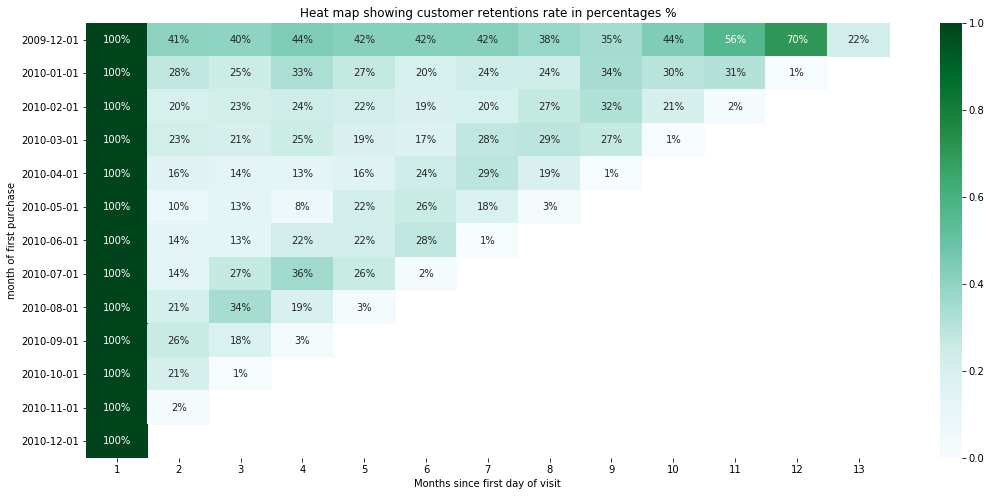

In [18]:
#plot a heatmap of the customer retention rate
plt.figure(figsize=(18,8))
sns.heatmap(cohort_counts.divide(initial_cohort_values,axis=0).round(2),annot=True,vmin=0,vmax=1,cmap='BuGn',fmt='.0%')
plt.xlabel('Months since first day of visit')
plt.title('Heat map showing customer retentions rate in percentages %')
plt.show()

More metrics can be built such as quanitity mean,quantity sum

# Build an RFM analysis

In [19]:
#build based on amount spent i.e monetary
#view the data
retail_data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Datepurchase,First Purchase,difference in months,month of first purchase
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009-12-01,1,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,1,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,1,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,2009-12-01,1,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,2009-12-01,1,2009-12-01


In [20]:
retail_data['Total sum']=retail_data['Quantity']*retail_data['Price']

In [21]:
#do it with a groupby
snapshot_date=retail_data['Datepurchase'].max()+dt.timedelta(days=1)
rfm_data=retail_data.groupby('Customer ID').aggregate({'InvoiceDate':lambda x: (snapshot_date-x.max()).days,
                                              'Invoice':'count',
                                              'Total sum':'sum'
                                             }).reset_index().rename(columns={'InvoiceDate':'Recency','Invoice':'Frequency','Total sum':'Monetary'})


In [22]:
rfm_data.sample(5)

,Customer ID,Recency,Frequency,Monetary
748,13418.0,7,261,6070.72
3712,17381.0,3,65,19726.76
2039,15143.0,67,17,304.18
4324,18210.0,17,10,147.45
550,13138.0,7,37,492.10


In [23]:
#get the quartile of rfm
frequency_quartiles=pd.qcut(rfm_data['Frequency'],q=4,labels=range(1,5))
monetary_quartiles=pd.qcut(rfm_data['Monetary'],q=4,labels=range(1,5))
recency_quartiles=pd.qcut(rfm_data['Recency'],q=4,labels=range(4,0,-1))

In [24]:
#assign the quartiles to the data frame
rfm_data['Recency_quartiles']=recency_quartiles
rfm_data['Frequency_quartiles']=frequency_quartiles
rfm_data['Monetary_quartiles']=monetary_quartiles

In [25]:
rfm_data.sample(5)

,Customer ID,Recency,Frequency,Monetary,Recency_quartiles,Frequency_quartiles,Monetary_quartiles
2760,16127.0,361,35,145.06,1,2,1
959,13696.0,56,25,2008.70,2,2,4
3239,16771.0,92,157,1720.79,2,4,4
2792,16166.0,63,26,327.48,2,2,2
3922,17662.0,296,15,412.92,1,1,2


In [26]:
#assign the rfm values as the segment
rfm_data['rfm_segment']=rfm_data[['Recency_quartiles','Frequency_quartiles','Monetary_quartiles']].apply(lambda x:str(x['Recency_quartiles'])+str(x['Frequency_quartiles'])+str(x['Monetary_quartiles']),axis=1)

In [27]:
#calculate and rfm score
rfm_data['rfm_score']=rfm_data[['Recency_quartiles','Frequency_quartiles','Monetary_quartiles']].apply(lambda x:int(x['Recency_quartiles'])+int(x['Frequency_quartiles'])+int(x['Monetary_quartiles']),axis=1)

In [28]:
rfm_data.sample(6)

,Customer ID,Recency,Frequency,Monetary,Recency_quartiles,Frequency_quartiles,Monetary_quartiles,rfm_segment,rfm_score
295,12803.0,28,55,1092.81,3,3,3,333,9
1011,13767.0,4,442,18169.97,4,4,4,444,12
2820,16202.0,52,108,2101.77,2,4,4,244,10
3967,17717.0,56,26,376.92,2,2,2,222,6
3360,16934.0,18,84,1139.81,3,3,3,333,9
2598,15918.0,266,21,248.65,1,2,1,121,4


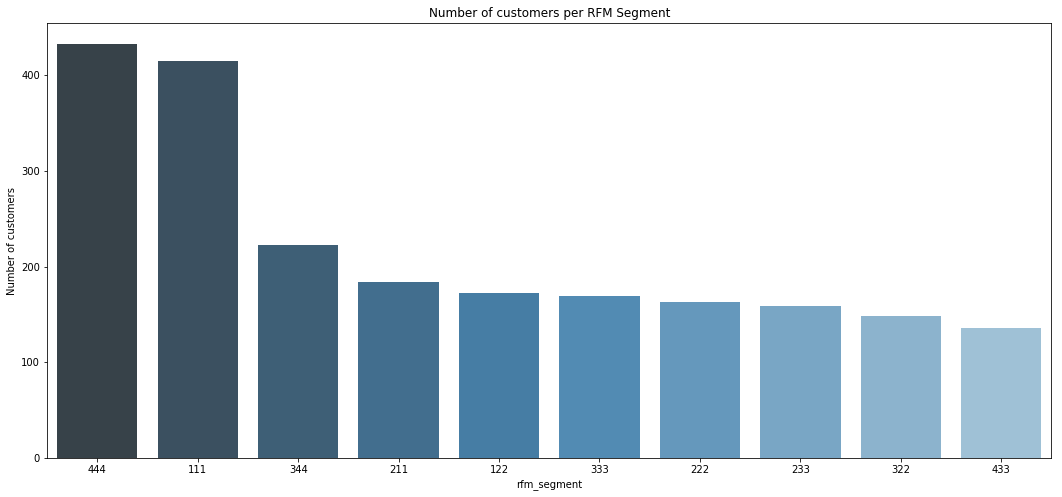

In [29]:
#review the largest rfm segments
first_segments=rfm_data.groupby('rfm_segment').size().sort_values(ascending=False)[:10]
plt.figure(figsize=(18,8))
sns.barplot(x=first_segments.index,y=first_segments.values,order=first_segments.index,palette="Blues_d")
plt.ylabel('Number of customers')
plt.title('Number of customers per RFM Segment')
plt.show()

In [30]:
#create custom grouping base on rfm score
def create_class(x):
    if x >=9:
        return "Gold"
    elif x>=5 and x<9:
        return 'Silver'
    else:
        return 'Bronze'

In [31]:
rfm_data['class']=rfm_data['rfm_score'].apply(lambda x:create_class(x))

In [32]:
#group and get recency frequency and monetary values
rfm_classes=rfm_data.groupby('class').aggregate({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean','count']
}).reset_index()

In [33]:
rfm_classes.columns=['Class','Recency','Frequency','Monetary','Count']

In [34]:
rfm_classes.sort_values('Monetary',ascending=False)

,Class,Recency,Frequency,Monetary,Count
1,Gold,26.668824,199.304118,4158.521882,1700
2,Silver,93.407606,37.276915,658.991218,1867
0,Bronze,216.269608,11.177696,59.295063,816


# Kmeans clustering

[<font color=blue>Kmeans explained </font>](https://www.youtube.com/watch?v=4b5d3muPQmA&t=94s) steps
1. Select the number of clusters(groups) you want to identify in your data. This also the K in K means clustering
2. Randomly select 3 distinct data points
3. Measure the distance between the first point and the three initial cluster (euclidean distance). Assign the point to the nearest cluster. Do that for all the other points.
4. Calculate the mean of each cluster.
5. Repeat measuring the nearest cluster with the mean values, iterate until there is no change in the output BAM!!
6. Assess the quality of the clustering by adding up variation within cluster use kmeans.inertia_ to get variation/ 
    The sum of squared errors
Repeat it all again with other starting points and pick clustering with the least variation

<font color=Red> How do we identify the number of clusters to use ?</font>
1.Each time we add a new cluster i.e increase the value of K the total variation reduces and the total variation goes to zero
if we have one point per cluster.
2. What is the point of doing clustering if we have one point per cluster???...
3. Thus we plot the variation with increasing values of K and pick the point where variation no longer decreases by a huge point i.e the elbow and pick K at that point as shown in the video





Kmeans key assumptions
1. All variables have a symmetric distribution i.e the distribution is not skewed
2. All variables have the same average values
3. Skewness can be reduced by taking the log of each of the variables

# Prepare the data before applying Kmeans

C:\Users\User\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


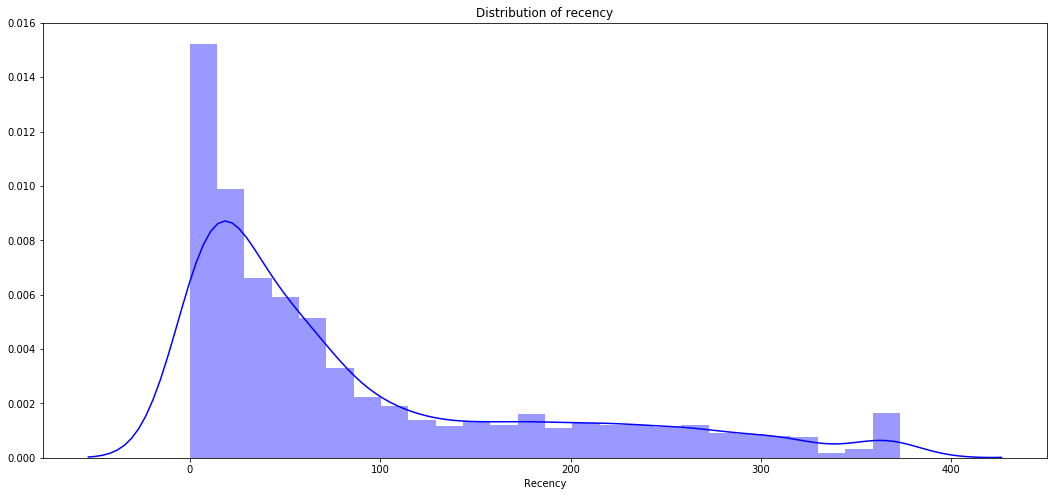

In [35]:
#explore the recency variable from our data
plt.figure(figsize=(18,8))
sns.distplot(rfm_data['Recency'],color='blue')
plt.title("Distribution of recency")
plt.show()

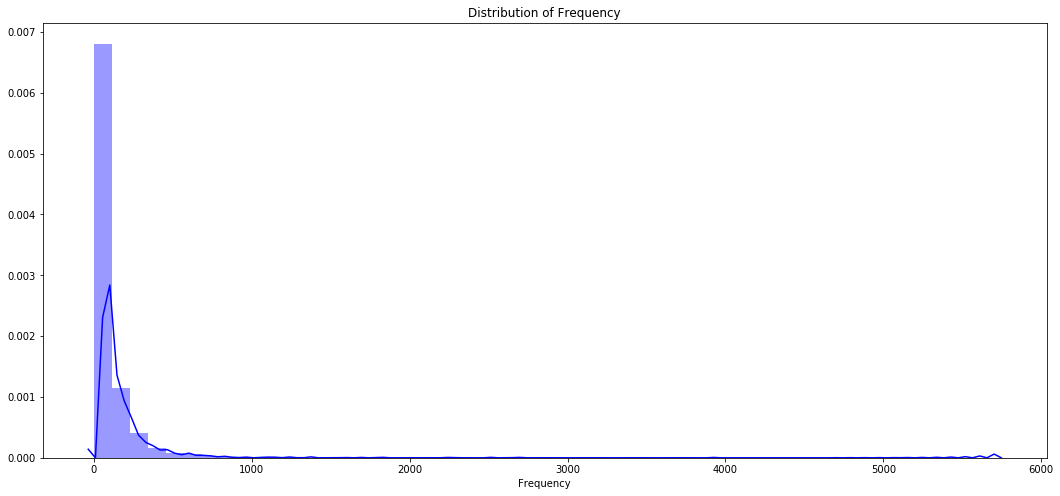

In [36]:
#explore the frequency variable from our data
plt.figure(figsize=(18,8))
sns.distplot(rfm_data['Frequency'],color='blue')
plt.title("Distribution of Frequency")
plt.show()

<font color=blue>How do we manage skewness?</font>

1. The easiest way on managing skewness is logarithmic transformation however this only works on positive values

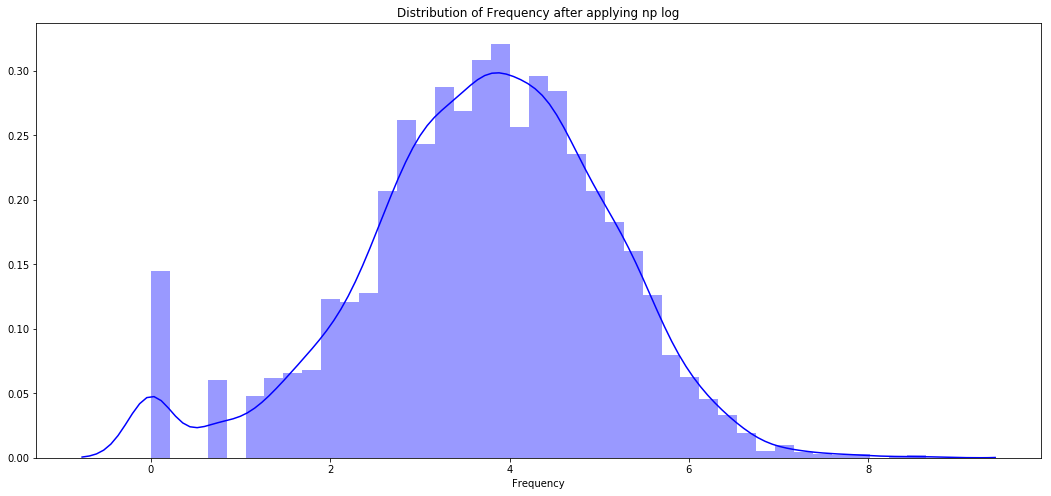

In [37]:
#using np log to manage skewness
frequency_log=np.log(rfm_data['Frequency'])
plt.figure(figsize=(18,8))
sns.distplot(frequency_log,color='blue')
plt.title("Distribution of Frequency after applying np log")
plt.show()

As from above the distribution seems to be normal

Logarithmic transformation only deals with positive values.

<font color=blue>How to deal with negative values ? </font>
    
1. Add a constant before log transformation
2. Cube root transformation
3. Other methods include normalization & Standardization

<font color='blue'>Centering variables with different means</font>

1. Centering can be done by subtracting the mean value from each variable.

2. We also need to scale variable with different standard deviation we can do this by dividing by the SD.

<font colour='blue'>Combining centering and scaling</font>

1. Subtract the mean and divide by standard deviation manually 
2. Use a scaler from sklearn library which returns a numpy array which is faster for kmeans to run a model on

In [38]:
#view key statistics of the data
rfm_data[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,4383.000000,4383.000000,4383.000000
mean,90.395848,95.262149,1904.679118
std,98.177019,204.903882,8519.369281
min,0.000000,1.000000,-25111.090000
25%,16.000000,18.000000,285.260000
50%,51.000000,44.000000,655.940000
75%,137.000000,103.000000,1645.690000
max,373.000000,5710.000000,341776.730000


As shown above there is a huge disparity in the mean

In [39]:
rfm_rfm_data=rfm_data[['Recency','Frequency','Monetary']]
#mutliply py -1 cases wherebey less than zero and add one to monetary 
#if less than this is because log makes this values inf or NAN if they are too small
rfm_rfm_data['Monetary']=rfm_rfm_data['Monetary'].apply(lambda x: -1*x if x < 0 else x)
rfm_rfm_data['Monetary']=rfm_rfm_data['Monetary'].apply(lambda x: x+1 if x < 1 else x)
rfm_rfm_data['Recency']=rfm_rfm_data['Recency'].apply(lambda x: x+1 if x == 0 else x)

C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

In [40]:
#using standard scaler to normalize and center our data
rfm_rfm_data_log=np.log(rfm_rfm_data.round(2))
sc=StandardScaler()
sc.fit(rfm_rfm_data_log)
tr_rfm_rfm_data=sc.transform(rfm_rfm_data_log)


In [41]:
print("The mean of the data is {}".format(tr_rfm_rfm_data.mean(axis=0).round(2)))
print("The mean of the data is {}".format(tr_rfm_rfm_data.std(axis=0).round(2)))

The mean of the data is [ 0. -0. -0.]
The mean of the data is [1. 1. 1.]


<font color='blue'>The following sequence is to be followed when preparing the data.</font>
1. Unskew the data log transformation
2. Standardize to the same average values
3. Scale to the same standard deviation
4. Store as a separate array to be used for clustering


# Apply Kmeans

In [42]:
#creating the model 
kmeans=KMeans(n_clusters=3,random_state=1)

In [43]:
#fit the model
kmeans.fit(tr_rfm_rfm_data)
#printing the unique labels/clusters.
np.unique(kmeans.labels_)

array([0, 1, 2])

In [44]:
#first trial on Kmeans
kmeans_rfm_data=rfm_rfm_data.assign(Cluster=kmeans.labels_)

In [45]:
kmeans_rfm_data.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean','count']
})

Recency   Frequency     Monetary      
               mean        mean         mean count
Cluster                                           
0         11.210321  254.732230  5717.373893  1027
1         77.599097   69.040642  1160.345667  1993
2        168.862069   13.445341   259.149326  1363

In [46]:
#choose the number of clusters with Kmeans
sse={}
for i in range(1,20):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(rfm_rfm_data)
    sse[i]=kmeans.inertia_
        

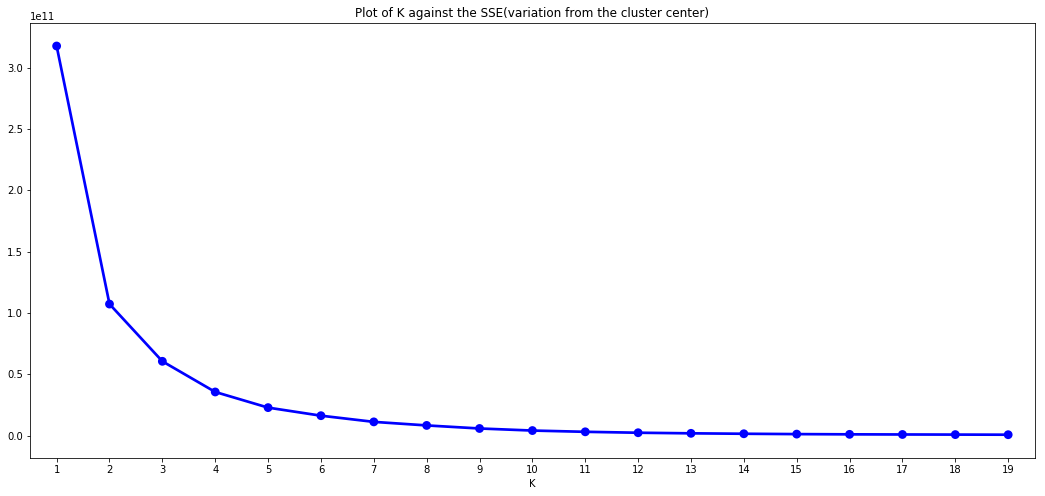

In [47]:
#plot so as to get the elbow and choose the optimum number of clusters
plt.figure(figsize=(18,8))
sns.pointplot(x=list(sse.keys()),y=list(sse.values()),color='blue')
plt.title("Plot of K against the SSE(variation from the cluster center)")
plt.xlabel("K")
plt.show()

One may choose various points of the elbow e.g 2 or 3 and run Kmeans cluster on this choose the one with the best output based on your business needs

In [48]:
#implement Kmeans on k = 3 and k=4
#earlier version was k=3 so we just copy the code
kmeans_rfm_data.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean','count']
})


Recency   Frequency     Monetary      
               mean        mean         mean count
Cluster                                           
0         11.210321  254.732230  5717.373893  1027
1         77.599097   69.040642  1160.345667  1993
2        168.862069   13.445341   259.149326  1363

In [49]:
#implement k=4 and observe the output
kmeans_2=KMeans(n_clusters=4,random_state=1)
kmeans_2.fit(tr_rfm_rfm_data)
kmeans_2_rfm_data=rfm_rfm_data.assign(Cluster=kmeans_2.labels_)
kmeans_2_rfm_data=kmeans_2_rfm_data.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean','count']
}).reset_index()
kmeans_2_rfm_data.columns=['Cluster','Recency','Frequency','Monetary','Count']
kmeans_2_rfm_data=kmeans_2_rfm_data.sort_values('Monetary',ascending=False)
kmeans_2_rfm_data

,Cluster,Recency,Frequency,Monetary,Count
1,1,5.234074,281.911111,7029.722615,675
3,3,51.404169,119.383995,1954.183677,1487
0,0,130.800472,27.646989,477.157852,1694
2,2,179.848197,5.476281,148.563833,527


As shown above 4 clusters seem to have a more granular view

In [63]:
#prepare data for snakeplot visualization
final_rfm_data=pd.DataFrame(tr_rfm_rfm_data,index=rfm_data['Customer ID'],columns=rfm_rfm_data.columns).reset_index()
final_rfm_data=final_rfm_data.assign(Cluster=kmeans_2.labels_)
final_rfm_data_melted=pd.melt(final_rfm_data,id_vars=['Customer ID','Cluster'],value_vars=['Recency','Frequency','Monetary'],var_name='Attribute',value_name='Value')

C:\Users\User\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


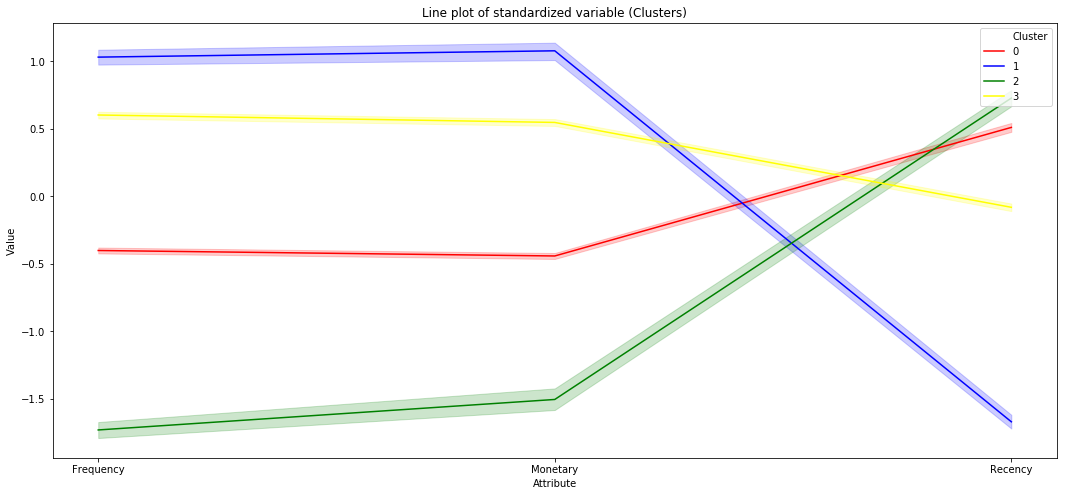

In [64]:
plt.figure(figsize=(18,8))
palette={0.0:'red',
        1.0:'blue',
        2.0:'green',
        3.0:'yellow'}
sns.lineplot(x=final_rfm_data_melted['Attribute'],y=final_rfm_data_melted['Value'],hue=final_rfm_data_melted['Cluster'],palette=palette)
plt.title("Line plot of standardized variable (Clusters)")
plt.show()

In [65]:
sns.lineplot?

In [52]:
#define the relative importance of the rfm values of each cluster i.e mean of the clusters - mean of the entire dataset
#cluster avg/population avg -1

relev_imp=((kmeans_2_rfm_data[['Recency','Frequency','Monetary']]/rfm_rfm_data.mean())-1).reset_index().rename(columns={'index':'Cluster'})

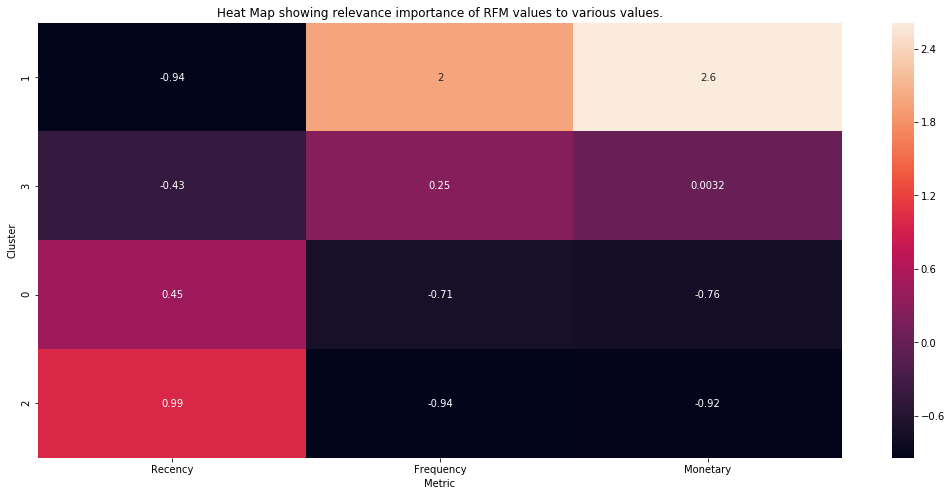

In [66]:
plt.figure(figsize=(18,8))
sns.heatmap(relev_imp[['Recency','Frequency','Monetary']],annot=True,fmt='.2g',yticklabels=relev_imp['Cluster'])
plt.ylabel("Cluster")
plt.xlabel("Metric")
plt.title("Heat Map showing relevance importance of RFM values to various values.")
plt.show()


In [69]:
d=['x',2,3,'h','x']

In [76]:
n=7
for i in range(n):
    for j in range(n-i-1):
        print(j)
    print('--')

0
1
2
3
4
5
--
0
1
2
3
4
--
0
1
2
3
--
0
1
2
--
0
1
--
0
--
--
